<a href="https://colab.research.google.com/github/mc-ivan/ml-grupo-3/blob/main/notebook/proyecto_final_grupo_3_ajustado_var_originales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

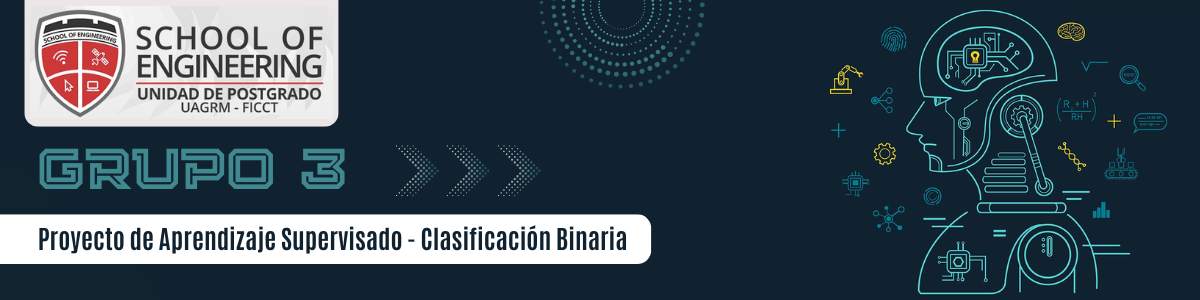

# Proyecto de Aprendizaje Supervisado - Clasificaci√≥n Binaria

### ü§ñ GRUPO 3
üë®‚Äçüéì **Integrantes del equipo:**  
- Karen Torrico
- Karen Huacota
- Jessica Luna
- Elvis Miranda
- Ivan Mamani

---

### ‚öôÔ∏è Detalles t√©cnicos del proyecto

- **Cantidad de observaciones:** 10,000 filas  
- **Cantidad de variables iniciales:** 66 columnas  
- **Variable objetivo (target):** `OBJ` (binaria)  
- **Variables utilizadas para modelado:** `V1` a `V30` (valores absolutos)  
- **Modelos evaluados:**  
  - Logistic Regression Classifier
  - Support Vector Machine Classifier with RBF Kernel (SVM_RBF).
  - Random Forest Classifier
  - Extreme Gradient Boosting Classifier (XGBoost)
- **Validaci√≥n:** GridSearchCV con Cross Validation (3 folds)  
- **M√©tricas evaluadas:** F1-score, AUC, Matriz de Confusi√≥n, Curva ROC  


üìÑ **Informe completo disponible en el archivo [`README.md`](https://github.com/mc-ivan/ml-grupo-3/blob/main/README.md)**  
Incluye justificaci√≥n de decisiones, an√°lisis exploratorio, limpieza de datos, evaluaci√≥n de modelos, selecci√≥n final y conclusiones.

---

# Desarrollo del Proyecto

### 1. Importacion de Librerias

In [1]:
# Librer√≠as para manipulaci√≥n y carga de datos
import pandas as pd              # Manejo de estructuras de datos (DataFrames)
from zipfile import ZipFile      # Para descomprimir archivos ZIP
import requests                  # Descarga de archivos desde URLs
import io                        # Manejo de flujos de datos en memoria (BytesIO)

# Librer√≠as para an√°lisis de datos y visualizaci√≥n
import numpy as np               # Operaciones num√©ricas y arrays
import seaborn as sns            # Visualizaci√≥n de datos estad√≠sticos (gr√°ficos de correlaci√≥n, etc.)
import matplotlib.pyplot as plt  # Visualizaci√≥n de gr√°ficos generales

# Librer√≠as para preprocesamiento y evaluaci√≥n de modelos
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
# train_test_split ‚Üí dividir datos en entrenamiento y prueba
# GridSearchCV ‚Üí b√∫squeda de hiperpar√°metros
# StratifiedKFold ‚Üí validaci√≥n cruzada respetando balance de clases
# cross_val_score ‚Üí evaluaci√≥n de modelos con validaci√≥n cruzada
from sklearn.preprocessing import StandardScaler  # Normalizaci√≥n o estandarizaci√≥n de variables num√©ricas

# Modelos de clasificaci√≥n
from sklearn.ensemble import RandomForestClassifier  # Clasificador de Bosques Aleatorios
from sklearn.linear_model import LogisticRegression  # Clasificador de Regresi√≥n Log√≠stica
from sklearn.svm import SVC
from xgboost import XGBClassifier                    # Clasificador basado en XGBoost (gradient boosting optimizado)

# M√©tricas de evaluaci√≥n y visualizaci√≥n de resultados
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay
# classification_report ‚Üí resumen de precisi√≥n, recall, F1
# confusion_matrix ‚Üí matriz de confusi√≥n
# roc_auc_score ‚Üí puntuaci√≥n AUC
# Displays ‚Üí gr√°ficos autom√°ticos de matriz de confusi√≥n y curva ROC

# T√©cnicas para balanceo de clases
from imblearn.over_sampling import SMOTE  # Aumento sint√©tico de muestras minoritarias (balance de clases)

### 2. Carga y Preparaci√≥n Inicial del Dataset

In [2]:
# Descargar el archivo ZIP desde el repositorio de GitHub (URL raw)
zip_url = "https://github.com/mc-ivan/ml-grupo-3/raw/main/dataset/GRUPO%203_1.zip"

response = requests.get(zip_url)
if response.status_code == 200:
    with ZipFile(io.BytesIO(response.content)) as zip_ref:
        zip_ref.extractall("/content/dataset")
else:
    print("Error al descargar el archivo:", response.status_code)

# Leer el CSV extra√≠do desde la carpeta local
csv_path = '/content/dataset/GRUPO 3_1.csv'
df = pd.read_csv(csv_path, sep='|')

# Verificaci√≥n inicial
print(df.head())
print(df.shape)

      ALEAT         ID OBJ           V1         V2       V3          V4  \
0  0.000008    3032834  SI     0.000000   0.000000  0.00000    0.790010   
1  0.000024  330323800  NO     0.000000   0.000000  0.00000    0.000000   
2  0.000025  270961897  SI     0.000000   0.093916  0.00000  160.044629   
3  0.000044  264138040  NO     0.000000   0.180006  0.00000    0.428190   
4  0.000067    7663508  NO  5830.495244  13.598254  0.43192  671.426908   

            V5        V6        V7  ...     V22_P     V23_P     V24_P  \
0   226.635983  1.493656  0.000000  ...  0.000413  0.039569  0.168177   
1     0.236730  0.000000  0.000000  ...  0.000000  0.047265  0.039317   
2   748.575600  3.053709  0.000000  ...  0.000190  0.364742  0.167146   
3     3.973445  0.037748  0.000000  ...  0.000000  0.133315  0.004763   
4  1229.464863  4.764769  0.014773  ...  0.003644  0.008413  0.047617   

      V25_P  V26_P  V27_P     V28_P     V29_P    V30_P   V31_P.1  
0  0.000000    0.0    0.0  0.000000  0.2410

### 3. Limpieza de Datos

In [3]:
# Inspeccionar todas las columnas
print(df.columns)

Index(['ALEAT', 'ID', 'OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'V29', 'V30', 'V31_P', 'VT', 'V1_P', 'V2_P', 'V3_P', 'V4_P', 'V5_P',
       'V6_P', 'V7_P', 'V8_P', 'V9_P', 'V10_P', 'V11_P', 'V12_P', 'V13_P',
       'V14_P', 'V15_P', 'V16_P', 'V17_P', 'V18_P', 'V19_P', 'V20_P', 'V21_P',
       'V22_P', 'V23_P', 'V24_P', 'V25_P', 'V26_P', 'V27_P', 'V28_P', 'V29_P',
       'V30_P', 'V31_P.1'],
      dtype='object')


In [4]:
# Observando el nombre de las columnas podemos observar que:
# ALEAT, ID -> Muy probablemente identificadores √∫nicos.
# V31_P, V31_P.1 -> No forman parte del bloque V1‚ÄìV30; sospechosas de ser duplicadas.
# VT -> Sospecha de identificador o columna t√©cnica auxiliar.

# Entonces comprobamos si son identificadores (Si el n√∫mero de valores √∫nicos es igual al n√∫mero de filas, mas probable que sea identificador)
for col in ['ALEAT', 'ID', 'VT']:
    if col in df.columns:
        print(col, "‚Üí Valores √∫nicos:", df[col].nunique(), "/", len(df))


ALEAT ‚Üí Valores √∫nicos: 9999 / 10000
ID ‚Üí Valores √∫nicos: 10000 / 10000
VT ‚Üí Valores √∫nicos: 9994 / 10000


In [5]:
# Eliminar columnas irrelevantes es para evitar que el modelo use datos que NO aportan valor predictivo
# (ejemplo: IDs, nombres aleatorios). Podr√≠an introducir ruido o incluso fugas de informaci√≥n.
df = df.drop(columns=['ALEAT', 'ID', 'VT'])
print(df.columns)

Index(['OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31_P', 'V1_P', 'V2_P', 'V3_P', 'V4_P', 'V5_P', 'V6_P', 'V7_P', 'V8_P',
       'V9_P', 'V10_P', 'V11_P', 'V12_P', 'V13_P', 'V14_P', 'V15_P', 'V16_P',
       'V17_P', 'V18_P', 'V19_P', 'V20_P', 'V21_P', 'V22_P', 'V23_P', 'V24_P',
       'V25_P', 'V26_P', 'V27_P', 'V28_P', 'V29_P', 'V30_P', 'V31_P.1'],
      dtype='object')


In [6]:
# Comprobamos que si 'V31_P' y 'V31_P.1' son columnas vac√≠as, residuales o con valor constante
for col in ['V31_P', 'V31_P.1']:
    if col in df.columns:
        print(col)
        print("Valores √∫nicos:", df[col].nunique())
        print("Porcentaje de nulos:", df[col].isnull().mean())
        print(df[col].value_counts(dropna=False).head())

V31_P
Valores √∫nicos: 9505
Porcentaje de nulos: 0.0
V31_P
0.000000     494
0.007360       2
72.433643      2
6.870077       1
2.673810       1
Name: count, dtype: int64
V31_P.1
Valores √∫nicos: 6160
Porcentaje de nulos: 0.0
V31_P.1
0.000000    494
0.000171      8
0.000015      8
0.000086      8
0.000059      7
Name: count, dtype: int64


In [7]:
# Al parecer son columnas con ruido t√©cnico o residuos de alguna operaci√≥n matem√°tica.
# El hecho de que ambas tengan exactamente el mismo n√∫mero de veces 0.000000 sugiere una relaci√≥n con la misma variable de origen.
# No aportan valor predictivo directo para un modelo tipo RandomForest o similar.
# Ademas no corresponden al rango de variables V1-V30 mencionado en el proyecto

# Se procede a eliminarlos
df = df.drop(columns=['V31_P', 'V31_P.1'])
print(df.columns)

Index(['OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V1_P', 'V2_P', 'V3_P', 'V4_P', 'V5_P', 'V6_P', 'V7_P', 'V8_P', 'V9_P',
       'V10_P', 'V11_P', 'V12_P', 'V13_P', 'V14_P', 'V15_P', 'V16_P', 'V17_P',
       'V18_P', 'V19_P', 'V20_P', 'V21_P', 'V22_P', 'V23_P', 'V24_P', 'V25_P',
       'V26_P', 'V27_P', 'V28_P', 'V29_P', 'V30_P'],
      dtype='object')


In [8]:
# Revisar valores √∫nicos por columna
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Columna constante o sin variaci√≥n: {col}")

Columna constante o sin variaci√≥n: V14
Columna constante o sin variaci√≥n: V14_P


In [9]:
# Las columnas V14 y V14_P tienen exactamente el mismo valor en todas las filas.
# No aportan ninguna informaci√≥n √∫til al modelo, porque no contribuyen a diferenciar clases.
df = df.drop(columns=['V14', 'V14_P'])
print(df.columns)

Index(['OBJ', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V1_P',
       'V2_P', 'V3_P', 'V4_P', 'V5_P', 'V6_P', 'V7_P', 'V8_P', 'V9_P', 'V10_P',
       'V11_P', 'V12_P', 'V13_P', 'V15_P', 'V16_P', 'V17_P', 'V18_P', 'V19_P',
       'V20_P', 'V21_P', 'V22_P', 'V23_P', 'V24_P', 'V25_P', 'V26_P', 'V27_P',
       'V28_P', 'V29_P', 'V30_P'],
      dtype='object')


In [10]:
# Verificar si tenemos datos nulos
print(df.isnull().mean().sort_values(ascending=False))

OBJ      0.0
V1       0.0
V2       0.0
V3       0.0
V4       0.0
V5       0.0
V6       0.0
V7       0.0
V8       0.0
V9       0.0
V10      0.0
V11      0.0
V12      0.0
V13      0.0
V15      0.0
V16      0.0
V17      0.0
V18      0.0
V19      0.0
V20      0.0
V21      0.0
V22      0.0
V23      0.0
V24      0.0
V25      0.0
V26      0.0
V27      0.0
V28      0.0
V29      0.0
V30      0.0
V1_P     0.0
V2_P     0.0
V3_P     0.0
V4_P     0.0
V5_P     0.0
V6_P     0.0
V7_P     0.0
V8_P     0.0
V9_P     0.0
V10_P    0.0
V11_P    0.0
V12_P    0.0
V13_P    0.0
V15_P    0.0
V16_P    0.0
V17_P    0.0
V18_P    0.0
V19_P    0.0
V20_P    0.0
V21_P    0.0
V22_P    0.0
V23_P    0.0
V24_P    0.0
V25_P    0.0
V26_P    0.0
V27_P    0.0
V28_P    0.0
V29_P    0.0
V30_P    0.0
dtype: float64


In [11]:
# Al parecer nuestro DataFrame no tiene valores nulos en ninguna de las columnas que quedan.
# Por lo tanto, no necesitamos aplicar imputaci√≥n ni eliminar filas o columnas por valores faltantes en este punto.
df.shape

(10000, 59)

### 4. Definici√≥n de variables a utilizar

In [12]:
variables_originales = [f'V{i}' for i in range(1, 31) if i != 14]
variables_relativas = [f'V{i}_P' for i in range(1, 31) if i != 14]

# Para este ejercicio, se opta por usar las variables absolutas (originales)
X = df[variables_originales]
y = df['OBJ'].map({'NO': 0, 'SI': 1})  # Conversi√≥n binaria

### Exploraci√≥n previa

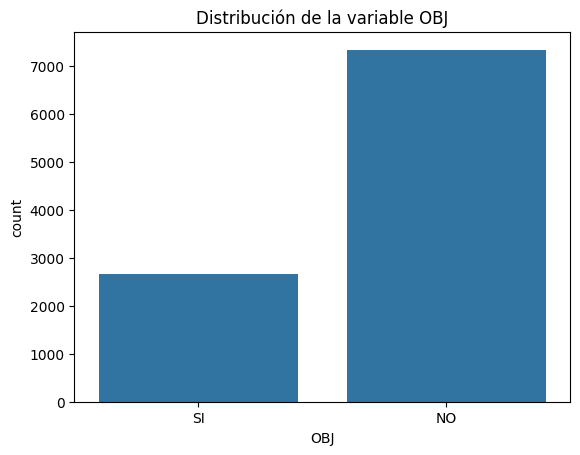

In [13]:
# Distribuci√≥n de la variable OBJ
sns.countplot(x=y.map({0: 'NO', 1: 'SI'}))
plt.title('Distribuci√≥n de la variable OBJ')
plt.show()

In [ ]:
# Interpretaci√≥n:
# Se observa un desbalance entre clases: ~27% SI (1) vs ~73% NO (0).
# Relevante para ajustar balance de clases en el modelado.

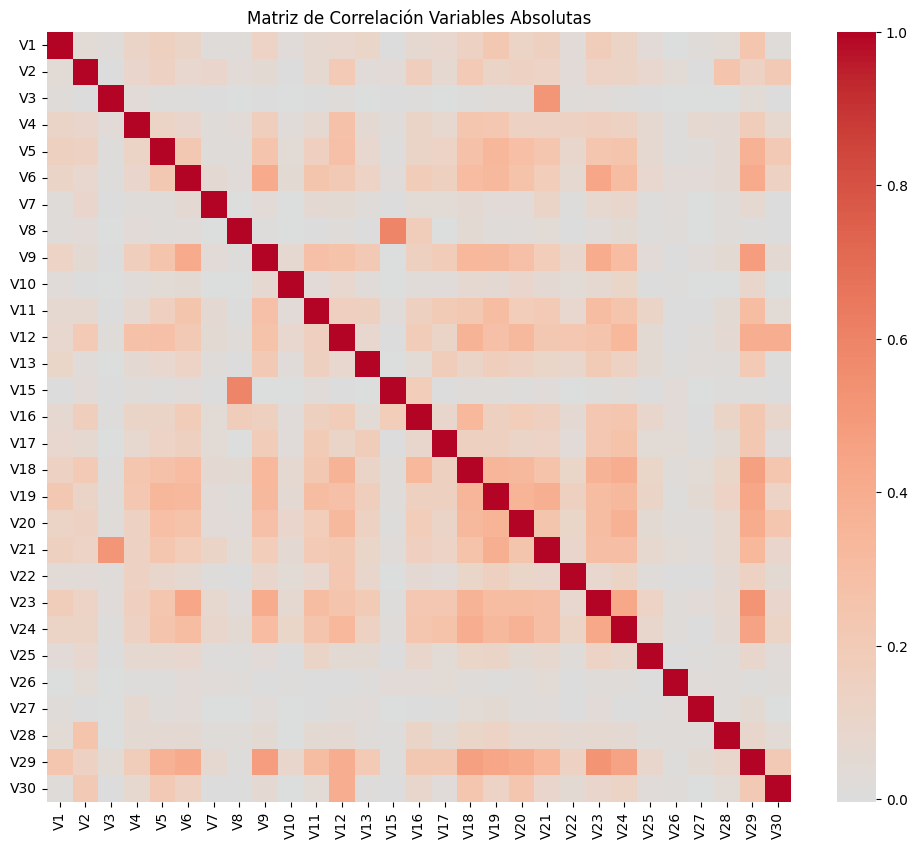

In [14]:
#Correlaci√≥n entre Variables
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', center=0)
plt.title('Matriz de Correlaci√≥n Variables Absolutas')
plt.show()

In [ ]:
# Interpretaci√≥n:
# La matriz de correlaci√≥n muestra relaciones d√©biles entre la mayor√≠a de variables.
# No se identifican variables altamente redundantes o colineales.

### 5. Divisi√≥n de datos y normalizaci√≥n

In [15]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Balanceo de Clases con SMOTE

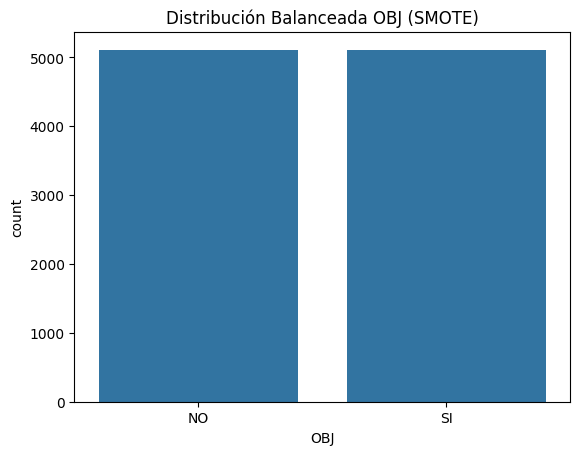

In [16]:
# Aplicamos la t√©cnica SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train_balanced.map({0: 'NO', 1: 'SI'}))
plt.title('Distribuci√≥n Balanceada OBJ (SMOTE)')
plt.show()

In [ ]:
# Interpretaci√≥n:
# Ahora ambas clases (SI y NO) cuentan con 5000 registros en el set de entrenamiento.
# Esto ayuda a evitar que el modelo favorezca la clase mayoritaria y mejora las m√©tricas de evaluaci√≥n.

### 6. Definici√≥n de Modelos y B√∫squeda de Hiperpar√°metros con GridSearchCV

In [ ]:
# Definimos un diccionario con los modelos y los rangos de hiperpar√°metros para probar en GridSearchCV
# Sin balanceo
# modelos = {
#     'LogisticRegression': {
#         'model': LogisticRegression(max_iter=5000),
#         'params': {'C': [0.01, 0.1, 1, 10]}
#     },
#     'RandomForest': {
#         'model': RandomForestClassifier(random_state=42),
#         'params': {'n_estimators': [100, 150], 'max_depth': [5, 10, None]}
#     },
#     'SVM_RBF': {
#         'model': SVC(kernel='rbf', probability=True),
#         'params': {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
#     }
# }

In [17]:
# Definimos un diccionario con los modelos y los rangos de hiperpar√°metros para probar en GridSearchCV
# Incluyendo balanceo de clases para abordar el desbalance detectado en el an√°lisis preliminar
modelos = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=5000, class_weight='balanced'),  # Ajuste de pesos autom√°ticos para clases desbalanceadas
        'params': {
            'C': [0.01, 0.1, 1, 10]  # Par√°metro de regularizaci√≥n (controla sobreajuste)
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42, class_weight='balanced'),
        'params': {
            'n_estimators': [50, 100, 150],         # N√∫mero de √°rboles en el bosque
            'max_depth': [5, 10, 15],               # Profundidad m√°xima de cada √°rbol
            'min_samples_split': [2, 5, 10],        # M√≠nimo de muestras requeridas para dividir un nodo
            'min_samples_leaf': [1, 3, 5]           # M√≠nimo de muestras requeridas en una hoja
        }
    },
    'SVM_RBF': {
        'model': SVC(kernel='rbf', probability=True, class_weight='balanced'),  # SVM con kernel radial, soporta probabilidad
        'params': {
            'C': [0.1, 1, 10],                      # Par√°metro de regularizaci√≥n
            'gamma': ['scale', 0.01, 0.001]         # Controla la forma de la frontera de decisi√≥n
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # XGBoost sin warnings de encoder
        'params': {
            'n_estimators': [100, 150],             # N√∫mero de √°rboles
            'max_depth': [3, 5, 7],                 # Profundidad m√°xima
            'scale_pos_weight': [1, 2, 5]           # Peso relativo para la clase positiva
        }
    }
}

In [18]:
# Diccionario para almacenar resultados de cada modelo
resultados = {}

# Definimos la validaci√≥n cruzada estratificada con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Iteramos sobre cada modelo definido en el diccionario
for nombre, m in modelos.items():
    # Configuramos GridSearchCV con los hiperpar√°metros y validaci√≥n cruzada
    grid = GridSearchCV(
        estimator=m['model'],
        param_grid=m['params'],
        cv=cv,
        scoring='f1',    # Se utiliza F1-score como m√©trica de evaluaci√≥n
        n_jobs=-1        # Usa todos los n√∫cleos disponibles para acelerar el proceso
    )

    # Entrenamos el modelo buscando la mejor combinaci√≥n de hiperpar√°metros
    grid.fit(X_train, y_train)

    # Guardamos el mejor modelo y sus par√°metros para an√°lisis posterior
    resultados[nombre] = {
        'mejor_modelo': grid.best_estimator_,
        'mejores_parametros': grid.best_params_,
        'mejor_score_cv': grid.best_score_
    }

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:38:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
# Mostrar resumen de resultados para cada modelo despu√©s de GridSearchCV
# for nombre, resultado in resultados.items():
#     print(f"Modelo: {nombre}")
#     print(f"Mejores par√°metros: {resultado['mejores_parametros']}")
#     print(f"Mejor F1-score (CrossVal): {resultado['mejor_score_cv']:.4f}")
#     print("-" * 100)

In [ ]:
# Interpretaci√≥n
# El modelo SVM con kernel RBF obtuvo el mejor desempe√±o seg√∫n F1-score promedio.
# RandomForest y XGBoost tuvieron resultados competitivos, mientras que LogisticRegression mostr√≥ el desempe√±o m√°s bajo.
# La selecci√≥n de hiperpar√°metros reflej√≥ un equilibrio entre ajuste del modelo y control de sobreajuste,
# priorizando modelos m√°s simples en lugar de configuraciones demasiado complejas.

### 7. Evaluaci√≥n Inicial con Validaci√≥n Cruzada

In [20]:

# cv_scores = cross_val_score(modelos['RandomForest']['model'], X, y, cv=3, scoring='f1')
# print("Scores para CrossValidation, 3 Folds:", cv_scores)
# print('Score Promedio para CrossValidation, 3 Folds: {:.3f}'.format(np.mean(cv_scores)))

# Seleccionamos el modelo RandomForest previamente configurado en el diccionario de modelos
model_rf = modelos['RandomForest']['model']

# Aplicamos validaci√≥n cruzada (Cross Validation) con 3 particiones (folds)
# cross_val_score entrena y eval√∫a el modelo en 3 ciclos diferentes para estimar su rendimiento promedio
cv_scores = cross_val_score(
    model_rf,       # Modelo de RandomForest con balanceo de clases configurado
    X,              # Variables independientes
    y,              # Variable objetivo (OBJ)
    cv=3,           # N√∫mero de folds en la validaci√≥n cruzada
    scoring='f1'    # M√©trica utilizada: F1-score (importante por el desbalance de clases)
)

# Mostramos los F1-score obtenidos en cada uno de los 3 folds
print("CrossVal F1 con pesos balanceados:", cv_scores)

# Calculamos y mostramos el promedio de los F1-score
print("Promedio:", np.mean(cv_scores))

CrossVal F1 con pesos balanceados: [0.07090719 0.05514316 0.07407407]
Promedio: 0.06670814306537125


In [21]:
# check Important features
model_rf.fit(X_train, y_train)

# Creamos un DataFrame para visualizar las importancias de cada variable (feature)
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": model_rf.feature_importances_}
).sort_values("importance", ascending=False)

# Mostramos el DataFrame resultante para analizar qu√© variables aportan m√°s al modelo
feature_importances_df

feature  importance
17     V19    0.056498
22     V24    0.056129
21     V23    0.052274
8       V9    0.052164
19     V21    0.051721
27     V29    0.050967
16     V18    0.050201
14     V16    0.049859
4       V5    0.049777
11     V12    0.049561
18     V20    0.049549
10     V11    0.049264
3       V4    0.046955
5       V6    0.046428
1       V2    0.043857
20     V22    0.042143
15     V17    0.041315
12     V13    0.040326
23     V25    0.031446
0       V1    0.020044
26     V28    0.013876
9      V10    0.013722
2       V3    0.012540
13     V15    0.008966
24     V26    0.006263
28     V30    0.006079
6       V7    0.004504
25     V27    0.001970
7       V8    0.001603

### 8. Evaluaci√≥n final


Modelo: LogisticRegression
Mejores par√°metros: {'C': 0.1}
              precision    recall  f1-score   support

           0       0.77      0.55      0.64      2225
           1       0.29      0.52      0.37       775

    accuracy                           0.54      3000
   macro avg       0.53      0.54      0.51      3000
weighted avg       0.64      0.54      0.57      3000

AUC: 0.5631408481333816


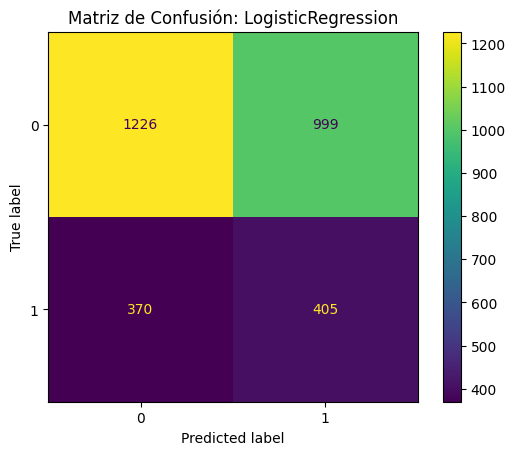

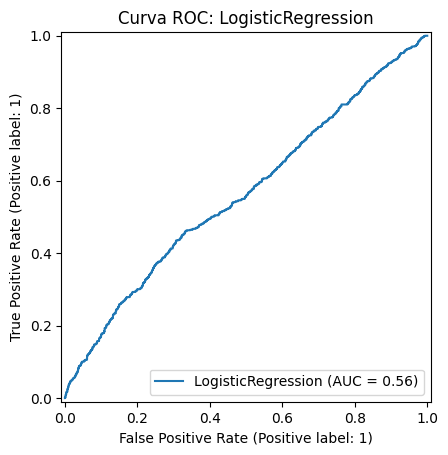


Modelo: RandomForest
Mejores par√°metros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      2225
           1       0.34      0.58      0.43       775

    accuracy                           0.60      3000
   macro avg       0.57      0.60      0.56      3000
weighted avg       0.69      0.60      0.63      3000

AUC: 0.6215562160202972


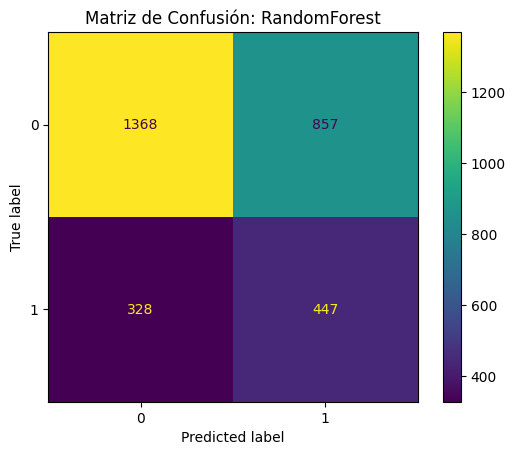

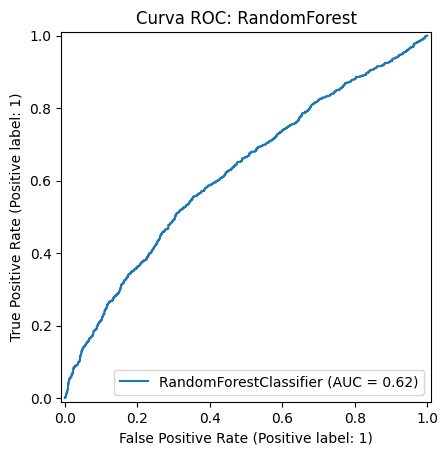


Modelo: SVM_RBF
Mejores par√°metros: {'C': 0.1, 'gamma': 0.001}
              precision    recall  f1-score   support

           0       0.84      0.07      0.13      2225
           1       0.26      0.96      0.42       775

    accuracy                           0.30      3000
   macro avg       0.55      0.52      0.27      3000
weighted avg       0.69      0.30      0.20      3000

AUC: 0.5240782892352301


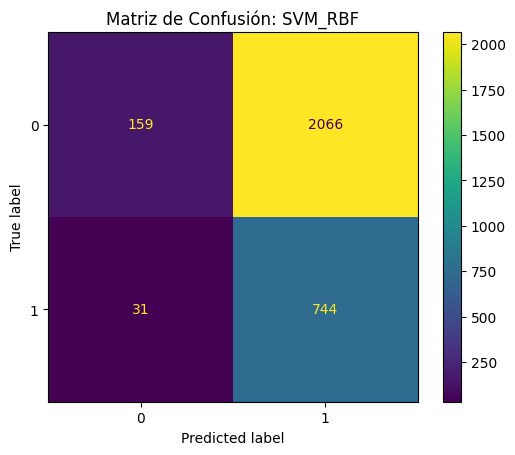

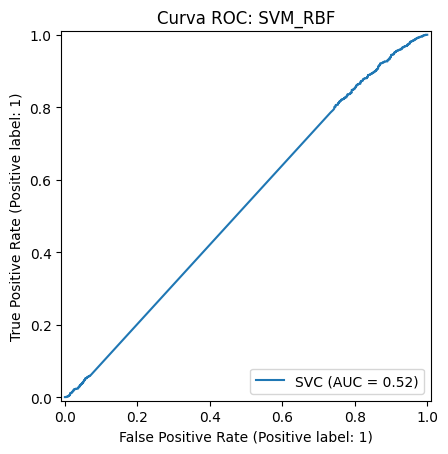


Modelo: XGBoost
Mejores par√°metros: {'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 5}
              precision    recall  f1-score   support

           0       0.79      0.34      0.48      2225
           1       0.28      0.74      0.41       775

    accuracy                           0.45      3000
   macro avg       0.54      0.54      0.44      3000
weighted avg       0.66      0.45      0.46      3000

AUC: 0.5960049293222183


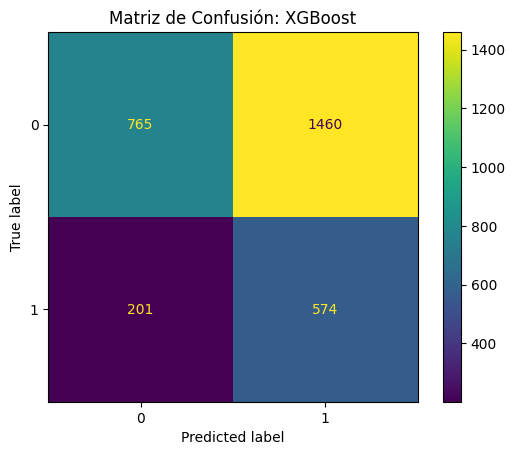

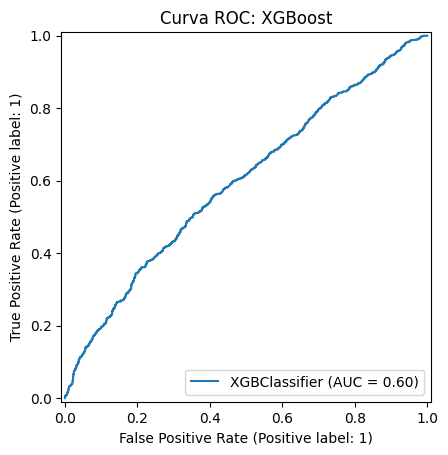

In [22]:
# Iteramos sobre cada modelo almacenado en el diccionario de resultados
for nombre, resultado in resultados.items():
    # Generamos las predicciones usando el modelo ya entrenado con los mejores par√°metros encontrados
    y_pred = resultado['mejor_modelo'].predict(X_test)
    print(f"\nModelo: {nombre}")
    print(f"Mejores par√°metros: {resultado['mejores_parametros']}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, resultado['mejor_modelo'].predict_proba(X_test)[:,1])}")

    # Graficamos la matriz de confusi√≥n para visualizar cu√°ntos aciertos y errores tuvo el modelo por clase
    ConfusionMatrixDisplay.from_estimator(resultado['mejor_modelo'], X_test, y_test)
    plt.title(f'Matriz de Confusi√≥n: {nombre}')
    plt.show()

    # Graficamos la curva ROC, que muestra la relaci√≥n entre tasa de verdaderos positivos vs falsos positivos
    RocCurveDisplay.from_estimator(resultado['mejor_modelo'], X_test, y_test)
    plt.title(f'Curva ROC: {nombre}')
    plt.show()

### 9. Conclusi√≥n

Tras evaluar varios modelos de clasificaci√≥n (Logistic Regression, Random Forest, SVM y XGBoost), **Random Forest** ha demostrado ser el m√°s equilibrado y efectivo en nuestro caso, con el mejor rendimiento en t√©rminos de **F1-score** y **AUC**. Aunque los modelos como SVM y XGBoost mostraron buenos resultados en algunas m√©tricas, **Random Forest** sobresale por su capacidad para manejar el desbalance de clases y su estabilidad general.

Por lo tanto, **Random Forest** se recomienda como el modelo final para la clasificaci√≥n de la variable `OBJ` en este conjunto de datos.